In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [ ]:
import os
import Bars

In [3]:
#import awesome_indicator

In [3]:
Bars.start_func()

Таймфрейм: D
Список котировок ('SBER', 'GAZP', 'YNDX', 'ROSN', 'OZON', 'SBERP', 'TCSG', 'NVTK', 'POLY', 'SIBN')
SBER
Файл .\Data\TQBR.SBER_D1.txt не найден и будет создан
GAZP
YNDX
ROSN
OZON
SBERP
TCSG
NVTK
POLY
SIBN
Таймфрейм: D
Список котировок ('VTBX',)
VTBX
Таймфрейм: D
Список котировок ('VTBA',)
VTBA


In [6]:
os.listdir('./Data')

['TQBR.GAZP_D1.txt',
 'TQBR.NVTK_D1.txt',
 'TQBR.OZON_D1.txt',
 'TQBR.POLY_D1.txt',
 'TQBR.ROSN_D1.txt',
 'TQBR.SBERP_D1.txt',
 'TQBR.SBER_D1.txt',
 'TQBR.SIBN_D1.txt',
 'TQBR.TCSG_D1.txt',
 'TQBR.YNDX_D1.txt',
 'TQTD.VTBA_D1.txt',
 'TQTF.VTBX_D1.txt']

## Функции

In [4]:
def func_1(x):
    
    return datetime.strptime(x[:10], '%d.%m.%Y')

In [5]:

def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    ao = short - long
    ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
    return ao_df

In [94]:
# trading strategy

def ao_signals(price, ao):
    buy_price = []
    sell_price = []
    ao_signal = []
    signal = 0
    
    for i in range(2, len(ao)):
        # На покупку
        if (ao[i] > 0 and ao[i-1] < 0) | (ao[i]>0 and ao[i-1]>0 and ao[i]>ao[i-1] and ao[i-1]<ao[i-2]):
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        # На продажу
        elif (ao[i] < 0 and ao[i-1] > 0) | (ao[i]<0 and ao[i-1]<0 and ao[i]<ao[i-1] and ao[i-1]>ao[i-2]):
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ao_signal.append(0)
            
    return buy_price, sell_price, ao_signal

In [110]:
# trading strategy

def ao_signals(price, ao):
    buy_price = []
    sell_price = []
    ao_signal = []
    
    for i in range(2, len(ao)):
        # На покупку
        if (ao[i] > 0 and ao[i-1] < 0) | (ao[i]>0 and ao[i-1]>0 and ao[i]>ao[i-1] and ao[i-1]<ao[i-2]):

            buy_price.append(price[i])
            sell_price.append(np.nan)
            signal = 1
            ao_signal.append(signal)

        # На продажу
        elif (ao[i] < 0 and ao[i-1] > 0) | (ao[i]<0 and ao[i-1]<0 and ao[i]<ao[i-1] and ao[i-1]>ao[i-2]):
            buy_price.append(np.nan)
            sell_price.append(price[i])
            signal = -1
            ao_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ao_signal.append(0)
            
    return buy_price, sell_price, ao_signal

In [12]:
for i in range(1, 5):
    print(i)

1
2
3
4


In [39]:
# trading strategy

def сrossing_zero_line(ao):

    ao_signal = []
    signal = 0
    
    for i in range(2, len(ao)):
        # На покупку
        if ao[i] > 0 and ao[i-1] < 0:
            if signal != 1:
                signal = 1
                ao_signal.append(signal)
            else:
                ao_signal.append(0)
        # На продажу
        elif ao[i] < 0 and ao[i-1] > 0:
            if signal != -1:
                signal = -1
                ao_signal.append(signal)
            else:
                ao_signal.append(0)
        else:
            ao_signal.append(0)
            
    return ao_signal

In [ ]:
def saucer(ao):

    ao_signal = []
    signal = 0
    
    for i in range(2, len(ao)):
        # На покупку
        if ao[i]>0 and ao[i-1]>0 and ao[i]>ao[i-1] and ao[i-1]<ao[i-2]:
            if signal != 1:
                signal = 1
                ao_signal.append(signal)
            else:
                ao_signal.append(0)
        elif ao[i]<0 and ao[i-1]<0 and ao[i]<ao[i-1] and ao[i-1]>ao[i-2]:
            if signal != -1:
                signal = -1
                ao_signal.append(signal)
            else:
                ao_signal.append(0)
        else:
            ao_signal.append(0)
            
    return ao_signal

In [9]:
def get_position(df, buy_price, sell_price, ao_signal):
    
    position = []
    for i in range(len(ao_signal)):
        if ao_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)
            
    for i in range(len(df['close'])):
        if ao_signal[i] == 1:
            position[i] = 1
        elif ao_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
            
    ao = df['ao']
    close_price = df['close']
    ao_signal = pd.DataFrame(ao_signal).rename(columns = {0:'ao_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'ao_position'}).set_index(df.index)
    
    frames = [close_price, ao, ao_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    
    return strategy

In [10]:
def get_retro(df, strategy):
    
    btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
    ao_strategy_ret = []
    
    for i in range(len(btc_ret)):
        returns = btc_ret['returns'][i]*strategy['ao_position'][i]
        ao_strategy_ret.append(returns)
        
    ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
    investment_value = 10000
    number_of_stocks = investment_value/df['close'][-1]
    ao_investment_ret = []
    
    for i in range(len(ao_strategy_ret_df['ao_returns'])):
        returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
        ao_investment_ret.append(returns)
    
    ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
    profit_percentage = round((total_investment_ret/investment_value)*100, 2)
    print('Profit gained from the AO strategy by investing 10k: {}'.format(total_investment_ret))
    print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

In [97]:
def signals_plot(df, buy_price, sell_price, ao_signal, prod_name):

    plt.figure(figsize=(16,12))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
    ax1.plot(df.index, df['close'], label = 'BTC', color = 'skyblue')
    ax1.plot(df.index, buy_price, marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
    ax1.plot(df.index, sell_price, marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
    ax1.legend()
    ax1.set_title(prod_name + ' SIGNALS')
    ax2 = plt.subplot2grid((10,1), (6,0), rowspan = 4, colspan = 1)
    for i in range(1, len(df)):
        if df['ao'][i-1] > df['ao'][i]:
            ax2.bar(i, df['ao'][i], color = '#f44336') #df.index[i]
        else:
            ax2.bar(i, df['ao'][i], color = '#26a69a')
    ax2.set_title('AWESOME OSCILLATOR 5,34')
    plt.show()

## Запуск

In [92]:
def get_signals(prod_name):
    
    print('----------------------------')
    print(prod_name)
    
    df = pd.read_csv('Data/' + prod_name, sep='\t')
    
    df.datetime = df.datetime.apply(lambda x: func_1(x))
    df.datetime = df.datetime.astype('datetime64')
    df = df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')].set_index('datetime')
    
    df['ao'] = ao(df['close'], 5, 34)
    df = df.dropna()
    
    buy_price, sell_price, ao_signal = ao_signals(df['close'], df['ao'])
    
    signals_plot(df[2:], buy_price, sell_price, ao_signal, prod_name)
    
    strategy = get_position(df[2:], buy_price, sell_price, ao_signal)
        
    return strategy

----------------------------
TQBR.SBER_D1.txt


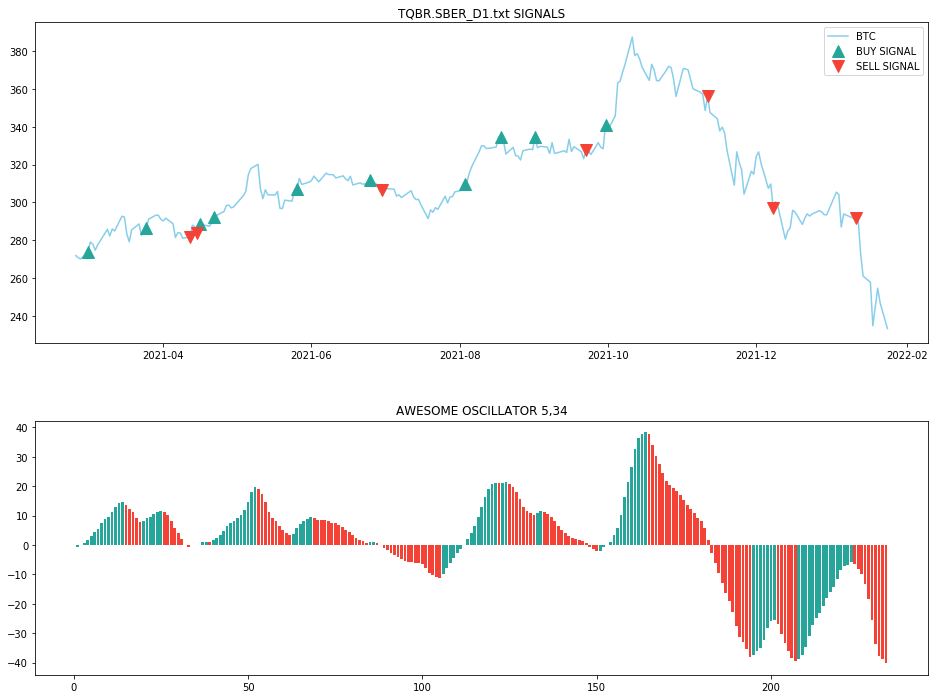

In [111]:
prod_name = 'TQBR.SBER_D1.txt'
strategy = get_signals(prod_name)

In [109]:
strategy.iloc[131:].head(5)

,close,ao,ao_signal,ao_position
datetime,,,,
2021-08-30,328.28,10.891471,0,1
2021-08-31,327.94,10.347882,0,1
2021-09-01,334.57,10.786971,0,1
2021-09-02,329.00,11.506500,0,1
2021-09-03,329.71,11.376618,0,1


## Вручную

In [47]:
prod_name = 'TQBR.GAZP_D1.txt'
print(prod_name)
    
df = pd.read_csv('Data/' + prod_name, sep='\t')
    
df.datetime = df.datetime.apply(lambda x: func_1(x))
df.datetime = df.datetime.astype('datetime64')
df = df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')].set_index('datetime')

TQBR.GAZP_D1.txt


In [48]:
df['ao'] = ao(df['close'], 5, 34)
df = df.dropna()

In [49]:
df.head()

,open,high,low,close,volume,ao
datetime,,,,,,
2021-02-20,226.35,227.10,225.00,225.84,605388,5.486912
2021-02-22,226.49,227.30,223.04,225.63,3141277,4.121206
2021-02-24,224.42,225.64,220.85,222.55,4079248,2.507441
2021-02-25,223.47,225.50,221.22,221.70,4272211,1.507029
2021-02-26,220.56,221.68,217.20,217.56,6373510,0.589412


In [40]:
ao_signal_1 = сrossing_zero_line(df['ao'])

In [41]:
ao_signal_2 = saucer(df['ao'])

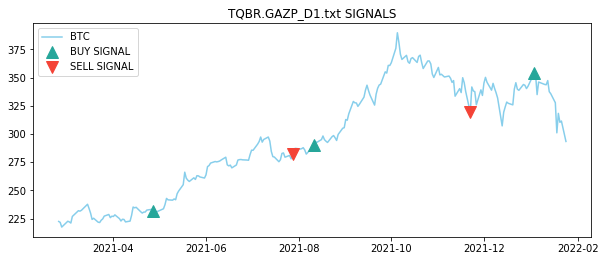

In [24]:
signals_plot(df[2:], buy_price, sell_price, ao_signal, prod_name)

In [25]:
buy_price, sell_price, ao_signal = сrossing_zero_line(df['close'], df['ao'])

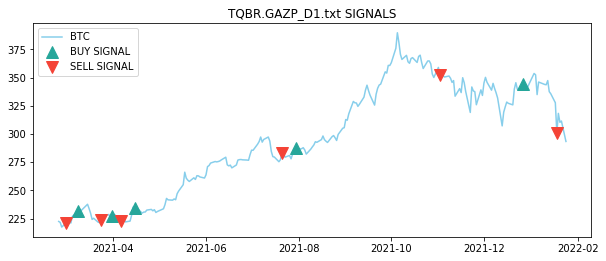

In [26]:
signals_plot(df[2:], buy_price, sell_price, ao_signal, prod_name)

In [22]:
df[1:]

,open,high,low,close,volume,ao
datetime,,,,,,
2021-02-22,226.49,227.30,223.04,225.63,3141277,4.121206
2021-02-24,224.42,225.64,220.85,222.55,4079248,2.507441
2021-02-25,223.47,225.50,221.22,221.70,4272211,1.507029
2021-02-26,220.56,221.68,217.20,217.56,6373510,0.589412
2021-03-01,219.34,222.01,218.25,221.47,2837359,-0.437765
...,...,...,...,...,...,...
2022-01-18,329.15,329.30,296.70,301.11,22009613,-3.409265
2022-01-19,300.00,320.42,282.72,318.36,22003631,-9.785588
2022-01-20,318.36,326.69,310.07,310.42,13026143,-14.665441


In [57]:
strategy.tail(20)

,close,ao,ao_signal,ao_position
datetime,,,,
2021-12-24,338.79,-0.220941,0,0
2021-12-27,343.97,3.002265,1,1
2021-12-28,343.23,5.262794,0,1
2021-12-29,340.33,5.218147,0,1
2021-12-30,342.39,4.929441,0,1
2022-01-03,353.73,6.354676,0,1
2022-01-04,352.55,8.277412,0,1
2022-01-05,335.00,8.300941,0,1
2022-01-06,346.13,8.269853,0,1


----------------------------
TQBR.GAZP_D1.txt


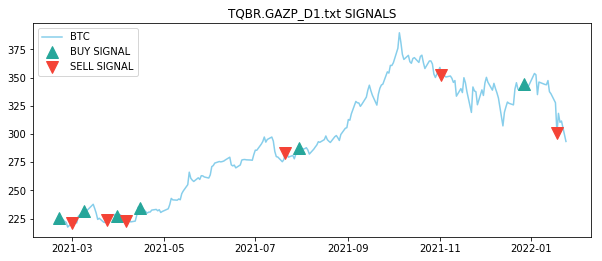

Profit gained from the AO strategy by investing 10k: 1820.63
Profit percentage of the AO strategy : 18.21%
----------------------------
TQBR.NVTK_D1.txt


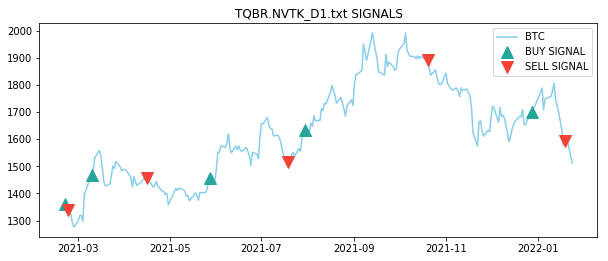

Profit gained from the AO strategy by investing 10k: 1181.06
Profit percentage of the AO strategy : 11.81%
----------------------------
TQBR.OZON_D1.txt


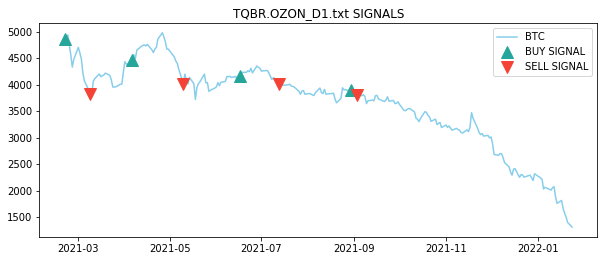

Profit gained from the AO strategy by investing 10k: -13175.57
Profit percentage of the AO strategy : -131.76%
----------------------------
TQBR.POLY_D1.txt


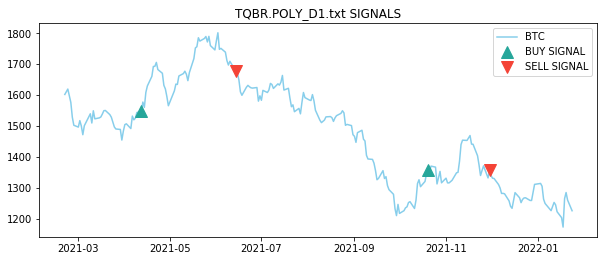

Profit gained from the AO strategy by investing 10k: 610.58
Profit percentage of the AO strategy : 6.11%
----------------------------
TQBR.ROSN_D1.txt


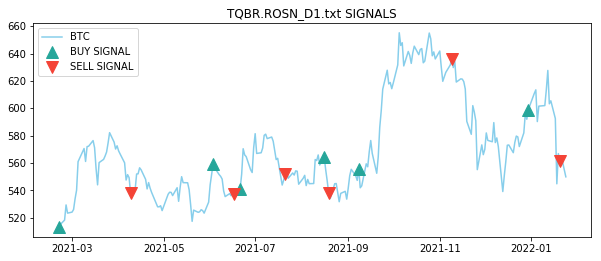

Profit gained from the AO strategy by investing 10k: 540.1
Profit percentage of the AO strategy : 5.4%
----------------------------
TQBR.SBERP_D1.txt


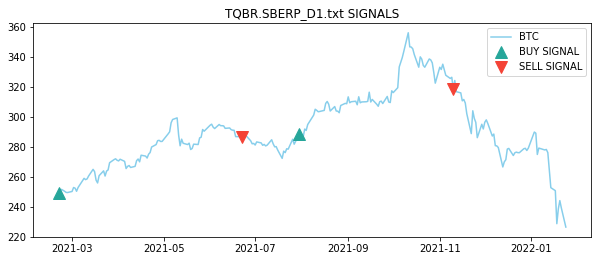

Profit gained from the AO strategy by investing 10k: 2961.47
Profit percentage of the AO strategy : 29.61%
----------------------------
TQBR.SBER_D1.txt


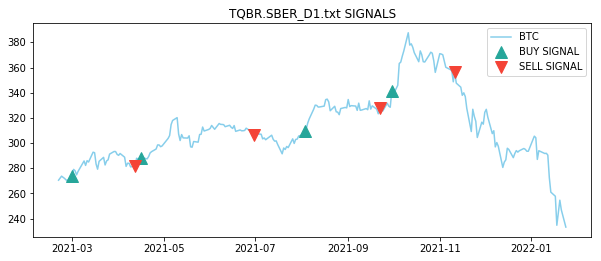

Profit gained from the AO strategy by investing 10k: 2672.98
Profit percentage of the AO strategy : 26.73%
----------------------------
TQBR.SIBN_D1.txt


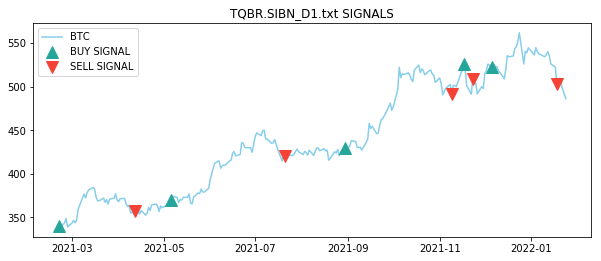

Profit gained from the AO strategy by investing 10k: 1915.92
Profit percentage of the AO strategy : 19.16%
----------------------------
TQBR.TCSG_D1.txt


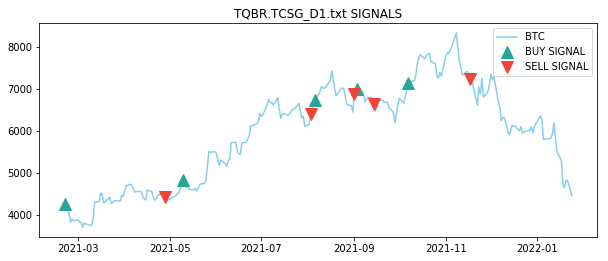

Profit gained from the AO strategy by investing 10k: 3684.09
Profit percentage of the AO strategy : 36.84%
----------------------------
TQBR.YNDX_D1.txt


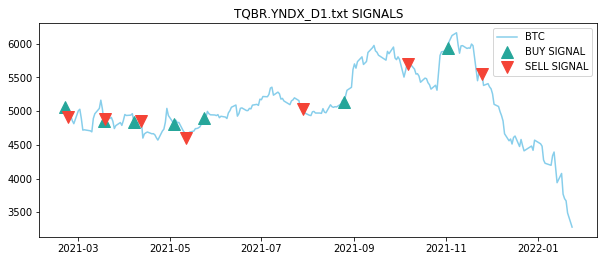

Profit gained from the AO strategy by investing 10k: 40.24
Profit percentage of the AO strategy : 0.4%
----------------------------
TQTD.VTBA_D1.txt


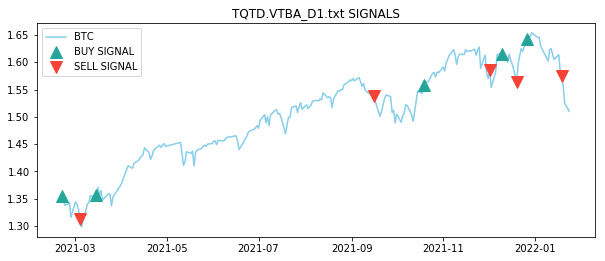

Profit gained from the AO strategy by investing 10k: 304.64
Profit percentage of the AO strategy : 3.05%
----------------------------
TQTF.VTBX_D1.txt


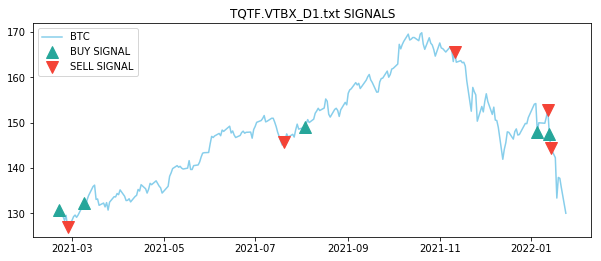

Profit gained from the AO strategy by investing 10k: 2153.02
Profit percentage of the AO strategy : 21.53%


In [10]:
for file_name in os.listdir('./Data'):

    get_backtest(file_name)

In [15]:
os.listdir('./Data')

['TQBR.GAZP_D1.txt',
 'TQBR.NVTK_D1.txt',
 'TQBR.OZON_D1.txt',
 'TQBR.POLY_D1.txt',
 'TQBR.ROSN_D1.txt',
 'TQBR.SBERP_D1.txt',
 'TQBR.SBER_D1.txt',
 'TQBR.SIBN_D1.txt',
 'TQBR.TCSG_D1.txt',
 'TQBR.YNDX_D1.txt',
 'TQTD.VTBA_D1.txt',
 'TQTF.VTBX_D1.txt']

## Котировки

In [33]:
df = pd.read_csv('Data/TQTF.VTBX_D1.txt', sep='\t')

In [34]:
def func_1(x):
    
    return datetime.strptime(x[:10], '%d.%m.%Y')

df.datetime = df.datetime.apply(lambda x: func_1(x))
df.datetime = df.datetime.astype('datetime64')

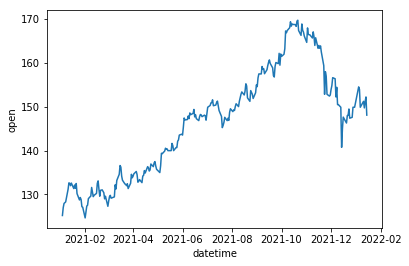

In [35]:
sns.lineplot(data=df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')], x="datetime", y="open")

In [36]:
df = df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')].set_index('datetime')
df.head()

,open,high,low,close,volume
datetime,,,,,
2021-01-04,125.20,127.5,125.20,127.20,157303
2021-01-05,127.00,128.0,125.40,127.80,149617
2021-01-06,127.95,128.5,127.05,128.05,132239
2021-01-08,128.30,132.0,128.05,131.50,190439
2021-01-11,131.20,133.6,130.40,132.65,478206


## Индикаторы

In [37]:
def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    ao = short - long
    ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
    return ao_df

df['ao'] = ao(df['close'], 5, 34)
df = df.dropna()
df.tail()

,open,high,low,close,volume,ao
datetime,,,,,,
2022-01-10,151.25,151.55,148.05,149.90,532551,0.581324
2022-01-11,149.75,151.85,149.00,151.25,429490,0.327941
2022-01-12,151.25,153.25,150.70,152.85,457742,-0.005147
2022-01-13,152.25,152.70,146.25,147.55,930193,0.014412
2022-01-14,148.10,148.60,140.05,144.40,1318864,-0.286029


## TRADING STRATEGY

In [38]:
def implement_ao_crossover(price, ao):
    buy_price = []
    sell_price = []
    ao_signal = []
    signal = 0
    
    for i in range(len(ao)):
        if ao[i] > 0 and ao[i-1] < 0:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        elif ao[i] < 0 and ao[i-1] > 0:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ao_signal.append(0)
    return buy_price, sell_price, ao_signal

buy_price, sell_price, ao_signal = implement_ao_crossover(df['close'], df['ao'])

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

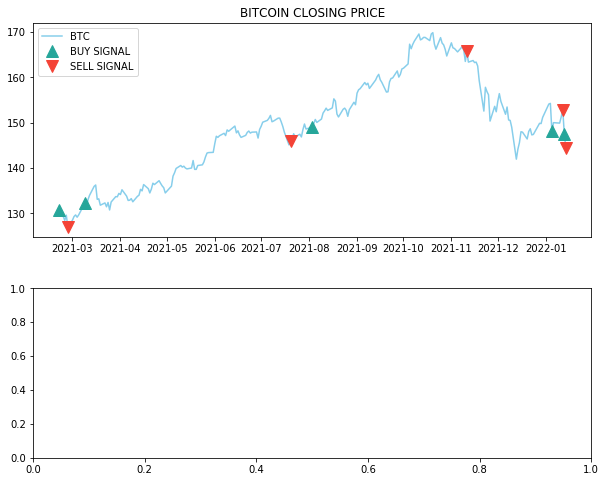

In [39]:
# TRADING SIGNALS PLOT
plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(df['close'], label = 'BTC', color = 'skyblue')
ax1.plot(df.index, buy_price, marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(df.index, sell_price, marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title('BITCOIN CLOSING PRICE')
for i in range(1, len(df)):
    if df['ao'][i-1] > df['ao'][i]:
        ax2.bar(df.index[i], df['ao'][i], color = '#f44336')
    else:
        ax2.bar(df.index[i], df['ao'][i], color = '#26a69a')
ax2.set_title('BITCOIN AWESOME OSCILLATOR 5,34')
plt.show()

In [40]:
df.index[i]

Timestamp('2021-02-22 00:00:00')

## POSITION

In [41]:
position = []
for i in range(len(ao_signal)):
    if ao_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])):
    if ao_signal[i] == 1:
        position[i] = 1
    elif ao_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
ao = df['ao']
close_price = df['close']
ao_signal = pd.DataFrame(ao_signal).rename(columns = {0:'ao_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'ao_position'}).set_index(df.index)

frames = [close_price, ao, ao_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

In [42]:
strategy.loc[lambda x: abs(x.ao_signal)==1]

,close,ao,ao_signal,ao_position
datetime,,,,
2021-02-20,130.80,1.387353,1,1
2021-02-26,127.00,-0.183971,-1,0
2021-03-09,132.25,0.322794,1,1
2021-07-20,145.85,-0.333676,-1,0
2021-08-03,149.15,0.251324,1,1
2021-11-11,165.70,-0.368088,-1,0
2022-01-05,148.05,0.116176,1,1
2022-01-12,152.85,-0.005147,-1,0
2022-01-13,147.55,0.014412,1,1


## BACKTEST

In [19]:
# BACKTESTING

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in SBER : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in SBER : 2388.89
Profit percentage of the AO strategy : 23.89%


In [31]:
# BACKTESTING GAZP

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in SBER : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in SBER : 2623.3
Profit percentage of the AO strategy : 26.23%


In [43]:
# BACKTESTING GAZP

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in VTBX : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in VTBX : 1939.06
Profit percentage of the AO strategy : 19.39%


In [26]:
# сбер
strategy.kst_signal.value_counts()

 0    252
-1      5
 1      5
Name: kst_signal, dtype: int64

In [25]:
strategy

,close,ao,ao_signal,ao_position
datetime,,,,
2021-02-20,270.51,-2.025088,0,1
2021-02-22,273.71,-1.830265,0,1
2021-02-24,271.90,-1.412206,0,1
2021-02-25,270.71,-0.734912,0,1
2021-02-26,270.17,-0.005647,0,1
...,...,...,...,...
2022-01-03,305.47,-11.678000,0,0
2022-01-04,304.24,-8.596500,0,0
2022-01-05,287.01,-7.266706,0,0
